# Predicting house prices using ML 





In [197]:
#importing neccesarry libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [198]:
train_data=pd.read_csv("/content/train.csv")

In [199]:
test_data=pd.read_csv("/content/test.csv")

In [200]:
train_data.shape

(1460, 81)

In [201]:
joined_data = pd.concat((train_data.loc[:,:], test_data.loc[:, :]))
joined_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


**Exploratory Data Analysis**

In [202]:
train_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 1.882876
Kurtosis: 6.536282


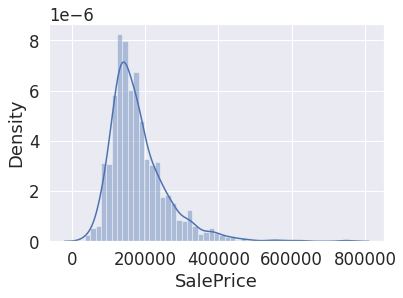

In [203]:
#determining skewness and kurtosis
sns.distplot(train_data['SalePrice'])

skewness=train_data['SalePrice'].skew()
kurtosis=train_data['SalePrice'].kurt()
print("Skewness: %f" % train_data['SalePrice'].skew())
print("Kurtosis: %f" % train_data['SalePrice'].kurt())


As we can see, mean is greater than the median: data is skewed to the right; therefore, the distibution will be normalized by using log transformation method.

Even though we normalized the data, we have outliers

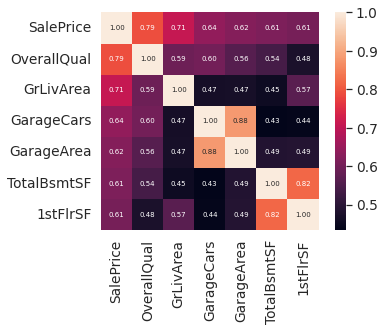

In [110]:
# Top 7 Heatmap for finding the most correlated features
k = 7 #number of variables for heatmap
import seaborn as sns
corrmat = train_data.corr()
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 7}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

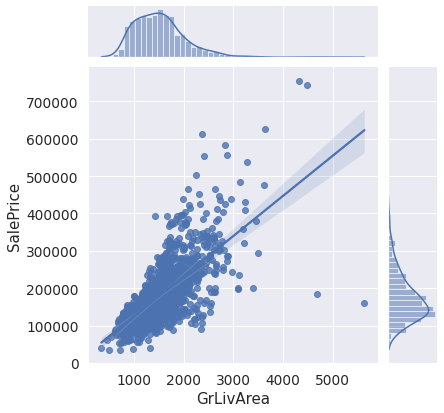

In [111]:
# Living Area and SalePrice

sns.jointplot(x=train_data['GrLivArea'], y=train_data['SalePrice'], kind='reg')


As we can see from the graph, SalePrice decreases when the Living Area is greater than 4000 and 5000 which doesn't make any sense. Therefore, we need to remove these 2 outliers from the data

In [ ]:
train_data = train_data.drop(train_data[(train_data['GrLivArea']>4000) 
                         & (train_data['SalePrice']<200000)].index).reset_index(drop=True)


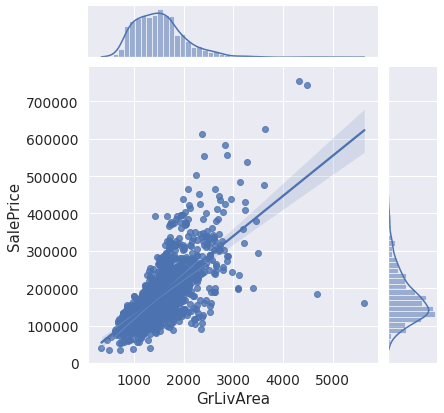

In [112]:
sns.jointplot(x=train_data['GrLivArea'], y=train_data['SalePrice'], kind='reg')


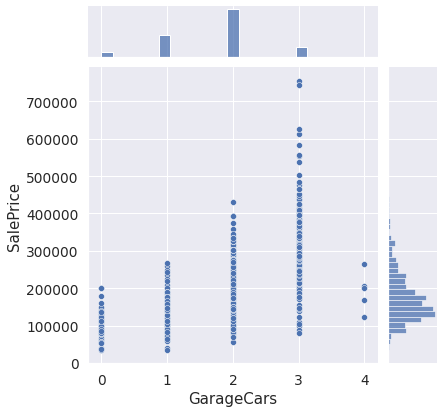

In [113]:
#GarageCars and SalePrice
sns.jointplot(x=train_data['GarageCars'], y=train_data['SalePrice'])


According to plot above, 4 garages result in lower price (less than 300000) which doesn't make any sense. Therefore, I'll remove this outlier


In [ ]:
train_data = train_data.drop(train_data[(train_data['GarageCars']>3) 
                         & (train_data['SalePrice']<300000)].index).reset_index(drop=True)

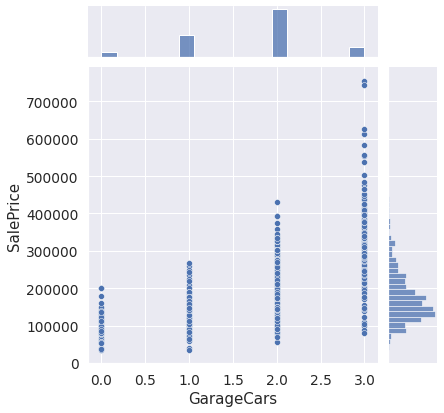

In [ ]:
sns.jointplot(x=train_data['GarageCars'], y=train_data['SalePrice'])


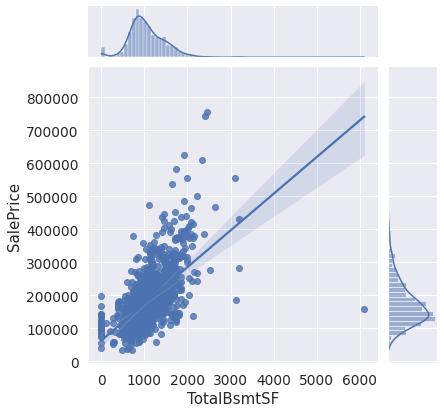

In [114]:
# Basement Area and SalePrice
sns.jointplot(x=train_data['TotalBsmtSF'], y=train_data['SalePrice'], kind='reg')


I don't think  that there is a need to make some corrections to data

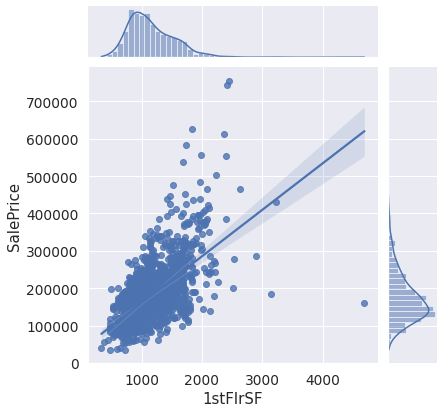

In [115]:
# First Floor Area and SalePrice
sns.jointplot(x=train_data['1stFlrSF'], y=train_data['SalePrice'], kind='reg')

**NaN Values and Data Imputation**


In [116]:

combined_data = pd.concat((train_data, test_data)).reset_index(drop=True)
print("Combined dataset size is : {}".format(combined_data.shape))



Combined dataset size is : (2919, 81)


In [117]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [118]:
#fraction of NaN values in train_data

nan_columns = combined_data.isna().sum() / combined_data.shape[0]

nan_columns[:20]


Id              0.000000
MSSubClass      0.000000
MSZoning        0.001370
LotFrontage     0.166495
LotArea         0.000000
Street          0.000000
Alley           0.932169
LotShape        0.000000
LandContour     0.000000
Utilities       0.000685
LotConfig       0.000000
LandSlope       0.000000
Neighborhood    0.000000
Condition1      0.000000
Condition2      0.000000
BldgType        0.000000
HouseStyle      0.000000
OverallQual     0.000000
OverallCond     0.000000
YearBuilt       0.000000
dtype: float64

Text(0.5, 1.0, 'Features with the highest percentage of NaN values')

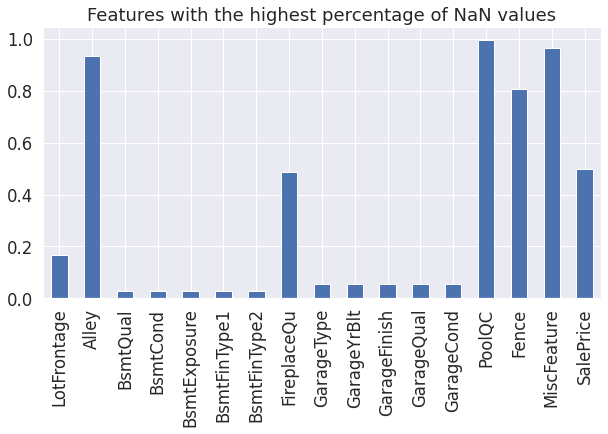

In [119]:
plt.figure(figsize=(10, 5))
sns.set(font_scale=1.5)
nan_columns[nan_columns > 0.01].plot(kind = "bar")
plt.title("Features with the highest percentage of NaN values")

In [120]:
#Data Imputation
combined_data["LotFrontage"] = combined_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))


In [121]:
combined_data["Alley"] = combined_data["Alley"].fillna(0)
combined_data["PoolQC"] = combined_data["PoolQC"].fillna(0)
combined_data["FireplaceQu"] = combined_data["FireplaceQu"].fillna(0)
combined_data["Fence"] = combined_data["Fence"].fillna(0)
combined_data["MiscFeature"] = combined_data["MiscFeature"].fillna(0)


**Feature Engineering**

In [122]:
combined_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.542994,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,21.703256,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,60.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,70.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [123]:
combined_data['MSSubClass'].describe()


count    2919.000000
mean       57.137718
std        42.517628
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64

As stated in "data_description.txt", "MSSubClass" variable identifies the type of dwelling involved in the sale. But here, it is interpreted as a numerical value instead of the categorical value. Therefore, we need to convert it to the categorical variable.



In [ ]:
combined_data['MSSubClass'] = combined_data['MSSubClass'].apply(str)


In [ ]:
combined_data['OverallCond'].describe()


count    2912.000000
mean        5.565591
std         1.113527
min         1.000000
25%         5.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: OverallCond, dtype: float64

In [ ]:
combined_data['OverallCond'] = combined_data['OverallCond'].apply(str)

In [ ]:
#converting numerical variables to categorical variables

def conversion_to_string(dataset, columns):
    dataset[columns] = dataset[columns].astype(str)
    return dataset

numerical_to_categorical = ['MoSold', 'YrSold','FireplaceQu']
combined_data = conversion_to_string(combined_data, columns = numerical_to_categorical)


**Label Encoding**

In [205]:

# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'ExterQual'.
combined_data['ExterQual']= label_encoder.fit_transform(combined_data['ExterQual'])

# Encode labels in column 'ExterCond'.
combined_data['ExterCond']= label_encoder.fit_transform(combined_data['ExterCond']) 

# Encode labels in column 'FireplaceQu'.
combined_data['FireplaceQu']= label_encoder.fit_transform(combined_data['FireplaceQu']) 

# Encode labels in column 'BsmtQual'
combined_data['BsmtQual']= label_encoder.fit_transform(combined_data['BsmtQual']) 

# Encode labels in column 'BsmtCond'
combined_data['BsmtCond']= label_encoder.fit_transform(combined_data['BsmtCond']) 


# Encode labels in column 'GarageQual'
combined_data['GarageQual']= label_encoder.fit_transform(combined_data['GarageQual']) 

# Encode labels in column 'GarageCond'
combined_data['GarageCond']= label_encoder.fit_transform(combined_data['GarageCond']) 


# Encode labels in column 'KitchenQual'
combined_data['KitchenQual']= label_encoder.fit_transform(combined_data['KitchenQual']) 


# Encode labels in column 'BsmtCond'
combined_data['BsmtCond']= label_encoder.fit_transform(combined_data['BsmtCond']) 


##Reference: https://www.geeksforgeeks.org/ml-label-encoding-of-datasets-in-python/

In [125]:
# Adding Total Square Feet variable to the dataset 

combined_data['TotalSF'] = combined_data['1stFlrSF'] + combined_data['2ndFlrSF']+combined_data['GrLivArea'] + combined_data["TotalBsmtSF"]


**Determining Skewness and Kurtosis**

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 1.882598
Kurtosis: 6.517516


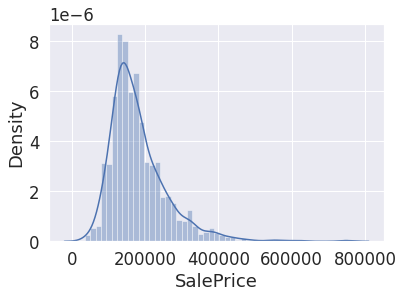

In [ ]:
#determining skewness and kurtosis
sns.distplot(train_data['SalePrice'])

skewness=train_data['SalePrice'].skew()
kurtosis=train_data['SalePrice'].kurt()
print("Skewness: %f" % train_data['SalePrice'].skew())
print("Kurtosis: %f" % train_data['SalePrice'].kurt())


/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 0.123637
Kurtosis: 0.803323


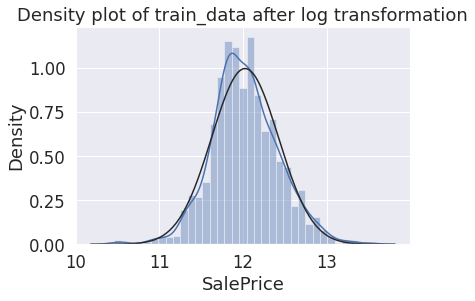

In [ ]:
#Removing Skewness
train_data["SalePrice"] = np.log1p(train_data["SalePrice"])

from scipy.stats import norm
sns.distplot(train_data['SalePrice'] , fit=norm)
plt.title('Density plot of train_data after log transformation')

print("Skewness: %f" % train_data['SalePrice'].skew())
print("Kurtosis: %f" % train_data['SalePrice'].kurt())

In [ ]:
combined_data = pd.get_dummies(combined_data).reindex(combined_data.columns, axis=1)
print(combined_data.shape)


(2912, 82)


In [129]:
print('Shape all_data: {}'.format(combined_data.shape))


Shape all_data: (2919, 82)


In [126]:
#Changing "MSSubClass" into a categorical variable
combined_data['MSSubClass'] = combined_data['MSSubClass'].apply(str)

#Changing "OverallCond" into a categorical variable
combined_data['OverallCond'] = combined_data['OverallCond'].astype(str)

#Year and month sold are transformed into categorical variables.
combined_data['YrSold'] = combined_data['YrSold'].astype(str)
combined_data['MoSold'] = combined_data['MoSold'].astype(str)

In [151]:
from sklearn.preprocessing import OneHotEncoder


In [154]:

OH_encoder = OneHotEncoder(sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(combined_data[object_cols]))
OH_cols.index = combined_data.index
OH_cols.columns = OH_encoder.get_feature_names_out()
combined_data = combined_data.drop(object_cols, axis=1)
combined_data = pd.concat([combined_data, OH_cols], axis=1)
#Reference: https://gist.github.com/skyiky/548707fb8dafd18ef4757dab15d8301b
     

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [130]:
combined_data = pd.get_dummies(combined_data)
print(combined_data.shape)

(2919, 327)


In [137]:
combined_data.head()


,Id,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,65.0,8450,7,2003,2003,196.0,2,4,706.0,...,0,0,0,1,0,0,0,0,1,0
1,2,80.0,9600,6,1976,1976,0.0,3,4,978.0,...,0,0,0,1,0,0,0,0,1,0
2,3,68.0,11250,7,2001,2002,162.0,2,4,486.0,...,0,0,0,1,0,0,0,0,1,0
3,4,60.0,9550,7,1915,1970,0.0,3,4,216.0,...,0,0,0,1,1,0,0,0,0,0
4,5,84.0,14260,8,2000,2000,350.0,2,4,655.0,...,0,0,0,1,0,0,0,0,1,0


**Modeling**

In [144]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, Lasso, LassoCV, LassoLarsCV
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.model_selection import GridSearchCV
import xgboost as xgb


In [152]:
s = (df_combined.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',len(object_cols))

Categorical variables:
['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'SaleType', 'SaleCondition']
No. of. categorical features:  39


In [177]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Split the training set into training and validation set

X_train, X_Test, Y_train, Y_Test = train_test_split(X_Train, Y_Train, train_size=0.7, test_size=0.3,random_state=0)

In [159]:
RFR = RandomForestRegressor()
RFR.fit(X_train, Y_train)
Y_pred = RFR.predict(X_Test)
print(mean_absolute_error(Y_Test, Y_pred))

17400.80948630137


In [160]:
GBR_model = GradientBoostingRegressor()
GBR_model.fit(X_train, Y_train)
Y_pred = GBR_model.predict(X_Test)
print(mean_absolute_error(Y_Test, Y_pred))

17193.283359745998


In [169]:
lasso=Lasso(alpha=0.05)
lasso.fit(X_train,Y_train)
lasso.score(X_train,Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.993e+11, tolerance: 7.191e+08
  model = cd_fast.enet_coordinate_descent(


0.9446090396182386

In [171]:
lasso.coef_

array([-3.09788457e+01,  1.09868555e+02,  7.55856474e-01,  6.12444790e+03,
        5.21491289e+03,  3.31210420e+02,  1.09526437e+02,  2.65733070e+01,
        2.89090714e+01,  2.29603020e+01,  1.31756406e+01,  9.27593280e+00,
        4.16412944e+01,  6.03429643e+01,  4.76604378e+01,  8.03755844e+00,
        2.28935605e+03,  1.85928886e+03,  5.11067957e+03,  1.37864797e+03,
       -5.00280948e+03, -1.46277160e+04,  1.53741487e+03,  4.73268329e+03,
        1.12058117e+00,  2.41529456e+03,  1.64408417e+01,  1.44849748e+01,
        1.82095809e+01,  2.04470754e+01,  1.76492860e+01,  1.16059179e+01,
        2.10343389e+02,  6.97838622e-01, -3.37755878e+02, -2.47787816e+02,
       -2.76320423e+04,  1.15338365e+04,  3.44973313e+02,  4.30827501e+03,
       -2.07425046e+03, -3.15707567e+04,  1.93524793e-09, -1.05047715e+03,
        4.19695019e+03,  3.44599173e+03, -1.85525243e+02,  1.98801527e+03,
       -1.10135406e+03, -1.72362540e+04,  3.52095353e+02,  0.00000000e+00,
        8.60662065e+03, -

In [173]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
ENet.fit(X_train,Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.057e+11, tolerance: 7.191e+08
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('robustscaler', RobustScaler()),
                ('elasticnet',
                 ElasticNet(alpha=0.0005, l1_ratio=0.9, random_state=3))])

In [191]:
# Evaluation of an Elastic Net model on the dataset
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha=.0005, l1_ratio=0.9)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=3)
scores = cross_val_score(model, X_train, Y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))


Mean MAE: 18263.099 (2344.907)
